# Performances: Generalization, Regularization

In [3]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fmin, minimize

1) Try to fit the following data with a straight line(y=mx+c). Plot data points along with actual function and your line.

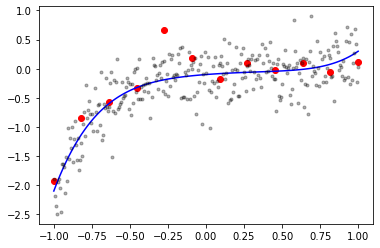

In [4]:
np.random.seed(7777)
ndata = 12
z = [0.6, -0.5, 0.4, -0.3, 0.2, -0.1]
a,b,c,d,e,f = z
noise = 0.3
xs = np.linspace(-1, 1, ndata)
tx = xs
ys = (a*tx**5 + b*tx**4 + c*tx**3 + d*tx**2 + e*tx + f) + np.random.randn(ndata)*noise
actualxs = np.linspace(-1,1,100)
tx = actualxs
actualys = (a*tx**5 + b*tx**4 + c*tx**3 + d*tx**2 + e*tx + f)

ntest = 300
testxs = np.linspace(-1,1,ntest)
tx = testxs
testys = (a*tx**5 + b*tx**4 + c*tx**3 + d*tx**2 + e*tx + f) + np.random.randn(ntest)*noise

plt.plot(xs, ys,'or')
plt.plot(actualxs, actualys,'b')
plt.plot(testxs, testys, '.k', alpha=0.3)

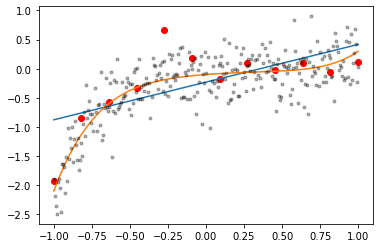

In [31]:
# I'm being nice
def guess(w, x):
    m, c = w
    return m*x + c

def cost(w):
    return sum((yy - guess(w,xx))**2 for xx, yy in zip(xs, ys))/len(xs)
    
w = minimize(cost, [0,0]).x

newx = np.linspace(-1, 1, 100)
newy = [guess(w, xx) for xx in newx]
plt.plot(xs, ys, 'or')
plt.plot(newx, newy)
plt.plot(actualxs, actualys)
plt.plot(testxs, testys, '.k', alpha=0.3)

2) What is your in-sample error? $E_{in}$

In [24]:
# Error in training data set

3) What is your out-sample error? $E_{out}$

In [25]:
# Error in testing data set aka out side world.

4) Between $E_{in}$ and $E_{out}$
- Which one do we really want to optimize? 
- Which one do we actually optimize when we train our model?

In [26]:
# we want to optimize Eout but when we train we can only see training data set so we did E_in.

4.5) Now find $E_{in}$ and $E_{out}$ for the example above.

In [32]:
def training_error(w):
    return sum((yy - guess(w,xx))**2 for xx, yy in zip(xs, ys))/len(xs)


def testing_error(w):
    return sum((yy - guess(w,xx))**2 for xx, yy in zip(testxs, testys))/len(testxs)

print('Ein', training_error(w))
print('Eout', testing_error(w))

Ein 0.2304716499317211
Eout 0.19297909635089028


5) Now Try fit it with polynomial degree 2 ($y = ax^2 + bx + c)$. Same deal, plot, find $E_{in}$ and $E_{out}$. (Think about a generic function that does this for any number of degree)

E_in 0.09606251748497559
E_out 0.1560742659650939


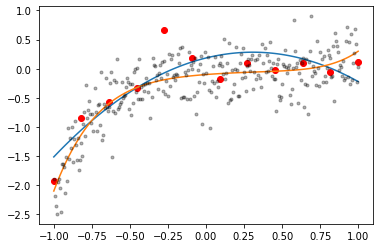

In [34]:
# You may find this useful
def polynomial(ws):
    def poly(x): # w_0 + w_1 * x + ... + w_n * x**n
        return sum(w*x**i for i, w in enumerate(ws))
    return poly

def guess(w, x):
    return polynomial(w)(x)

def make_cost(xs, ys):
    def cost(w):
        return sum((yy - guess(w,xx))**2 for xx, yy in zip(xs, ys))/len(xs)
    return cost

training_error = make_cost(xs, ys) # E_in

w = minimize(training_error, [0,0,0]).x

newx = np.linspace(-1, 1, 100)
newy = [guess(w, xx) for xx in newx]
plt.plot(xs, ys, 'or')
plt.plot(newx, newy)
plt.plot(actualxs, actualys)
plt.plot(testxs, testys, '.k', alpha=0.3)

training_error(w)

testing_error = make_cost(testxs, testys) # E_out

print('E_in', training_error(w))
print('E_out', testing_error(w))

6) Try it with degree 3, 4, 5 ... 11. Can you explain what happen at degree 11?

<span style="color:red;"> DO NOT COPY PASTE codes. Write a function and use for loop </span>

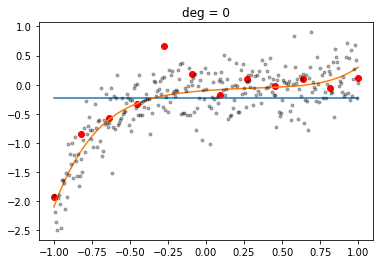

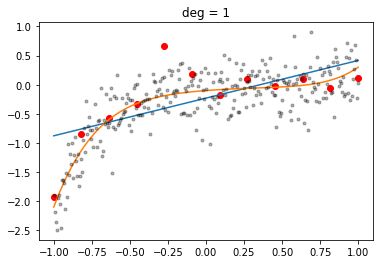

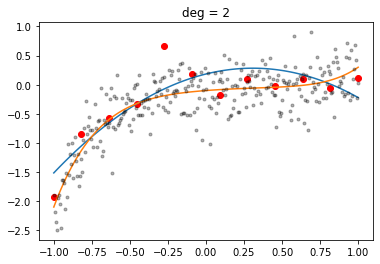

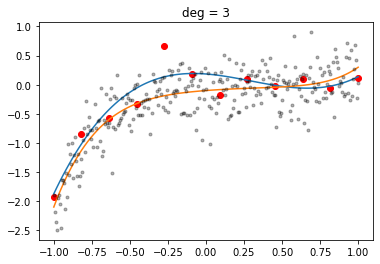

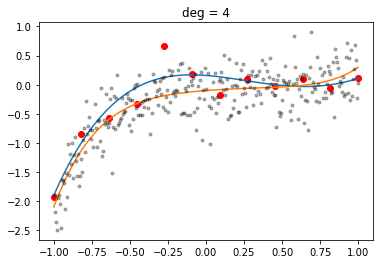

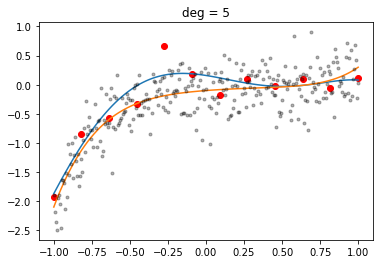

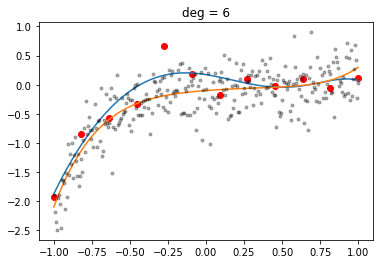

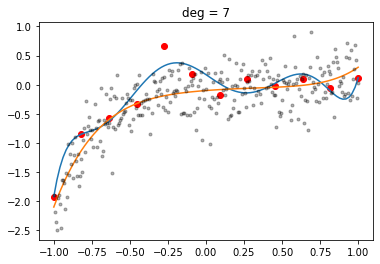

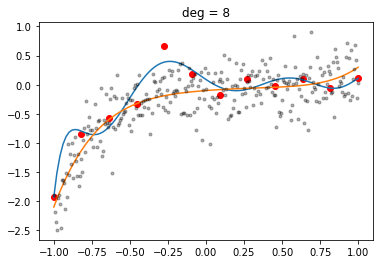

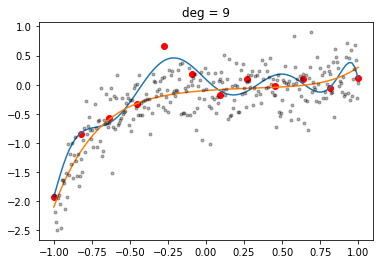

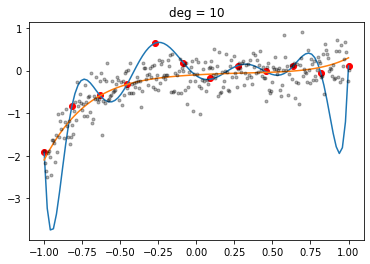

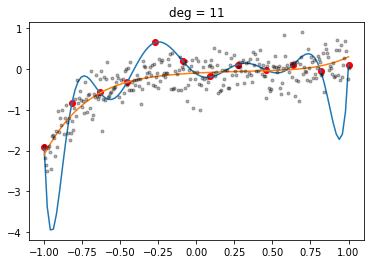

In [35]:
for i in range(1,13):
    w = minimize(training_error, [0]*i).x
    newx = np.linspace(-1, 1, 100)
    newy = [guess(w, xx) for xx in newx]
    plt.figure()
    plt.title(f'deg = {i-1}')
    plt.plot(xs, ys, 'or')
    plt.plot(newx, newy)
    plt.plot(actualxs, actualys)
    plt.plot(testxs, testys, '.k', alpha=0.3)

7) Now plot polynomial degree vs $E_{in}$ and degree vs $E_{out}$

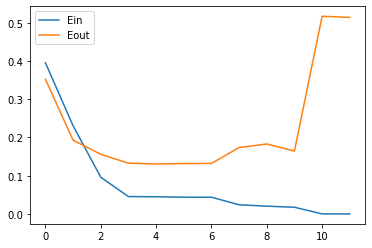

In [37]:
deg = []
eins = []
eouts = []
for i in range(1,13):
    w = minimize(training_error, [0]*i).x
    deg.append(i-1)
    eins.append(training_error(w))
    eouts.append(testing_error(w))
    
plt.plot(deg, eins, label='Ein')
plt.plot(deg, eouts, label="Eout")
plt.legend()

8) Explain why you see the graph you see in above.

- What's wrong with model that is too simple
- What's wrong with model that is too complex

In [38]:
# too simple/too complex --> Bad out of sample performance
# too simple --> Underfit
# too complex --> Overfit

# Regularization.

1) Print $w$ from those degree 11 polynomial model. What went wrong with overly complex model?

In [41]:
w = minimize(training_error, [0]*5).x
print(w)
w = minimize(training_error, [0]*12).x
print(w)

# w's are huge

[ 0.15899989 -0.1996152  -0.83051136  1.20498583 -0.22347029]
[-1.20909372e-01 -2.40510688e+00  1.60024352e+01  2.30401268e+01
 -1.59433601e+02 -5.44338236e+01  5.16464132e+02  2.71937721e+01
 -6.66926862e+02  4.02375736e+01  2.93106695e+02 -3.26166141e+01]


2) How should we penalize the model to prevent overly complex model?

In particular, what is does the penalized cost function looks like?

In [42]:
# sum(w[1:]^2) # the zeroth one is the offset

3) What happen if our penalty is too small? What happend if our penalty is too big?

In [ ]:
# complexity penalty too big --> end up with small model
# complexity penalty too small --> end up with too complex model

4) If $\lambda$ is small do we expect to get complex or simple model? Why?

$cost(w) = \text{training error}(w) + \lambda \times complexity(w)$

In [ ]:
# if lambda is too small then we sort of ignore complexity.
# then we will end up with overfitting.

5)Try Regularize 11 deg polynomial. with $\lambda=1\times10^{-8}$, $\lambda=0.01$ and $\lambda=100$. Plot the graphs and print out training and testing error.

1e-08 0.0017507576367000622 0.3006938751474077
0.1 0.06103993716140765 0.1335736465283081
100 0.3888242113510774 0.3481808889905462


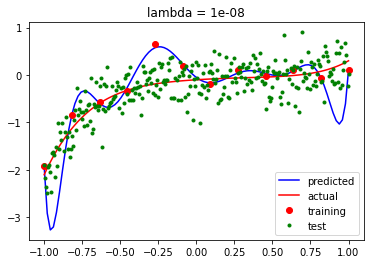

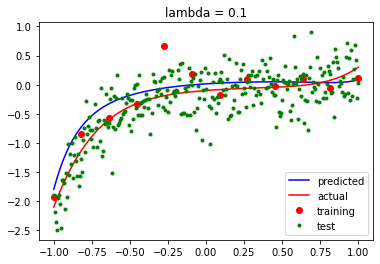

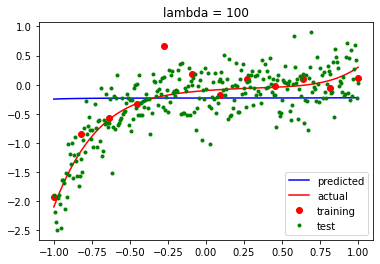

In [47]:
def make_cost(lmd, xs, ys):
    def cost(w):
        return sum((yy - guess(w,xx))**2 for xx, yy in zip(xs, ys))/len(xs) + lmd*sum(w[1:]**2)
    return cost

lmds = [1e-8, 1e-1, 100]
for lmd in lmds:
    training_cost = make_cost(lmd, xs, ys)
    training_error = make_cost(0, xs, ys) # error has no complexity term
    testing_error = make_cost(0, testxs, testys)
    w = minimize(training_cost, [0]*12).x
    predicted_xs = np.linspace(-1, 1, 100)
    predicted_ys = polynomial(w)(predicted_xs)
    plt.figure()
    plt.title(f'lambda = {lmd}')
    plt.plot(predicted_xs, predicted_ys, '-b', label='predicted')
    plt.plot(actualxs, actualys, '-r', label='actual')
    plt.plot(xs, ys, 'or', label='training')
    plt.plot(testxs, testys, '.g', label='test')
    plt.legend()
    print(lmd, training_error(w), testing_error(w))

6) Sketch by hand $E_{in}$ and $E_{out}$ vs $\lambda$. Then, Try plotting $\log(1/\lambda)$ vs Ein and Eout. 

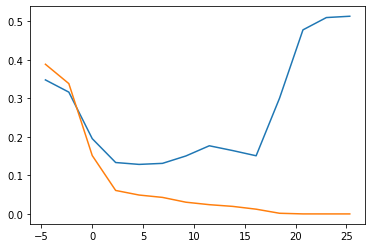

In [62]:
lmds = np.array([10**i for i in range(-11, 3)])
eins = []
eouts = []
for lmd in lmds:
    training_cost = make_cost(lmd, xs, ys)
    training_error = make_cost(0, xs, ys) # error has no complexity term
    testing_error = make_cost(0, testxs, testys)
    w = minimize(training_cost, [0]*12).x
    eins.append(testing_error(w))
    eouts.append(training_error(w))
    
plt.plot(np.log(1/lmds), eins)
plt.plot(np.log(1/lmds), eouts)

# Model Selection

1) Why don't  we just use every single data to train?

In [ ]:
# we know we can't trust in sample error
# so to select the model we need a fresh new dataset.

2) What is validation data set for?

In [ ]:
# to compare among all the model(ex: lambda's) which one is the best

3) Why can't use validation set to report the expected out of sample performance?

In [ ]:
# since we select the model with validation set already.
# doing so will result in bias on error.

4) What is test data set for?

In [ ]:
# measure the performance.

5) What's wrong if we use too much data set for validation and test sample?

In [ ]:
# nothing is left for testing.

# Cross-Validation

1) What was the problem with using 1 validation data set?

In [ ]:
# we could be too lucky.

2) How does cross validation solves it?

In [ ]:
# We try many attempts so no more luck

3) In what kind of situation radomized stratification is a bad idea?

In [ ]:
# In some situation, we want to see how it extrapolates.
# Randomize stratification will cheat on the performance by "seeing the average".

4) If we want to report our $E_{out, expected} = x \pm \delta x$, how should we get $x$ and $\delta x$

In [48]:
# mean and std of the error

5) Try find that number for $\lambda = 0.01$

0.12869389828789543 2.7755575615628914e-17


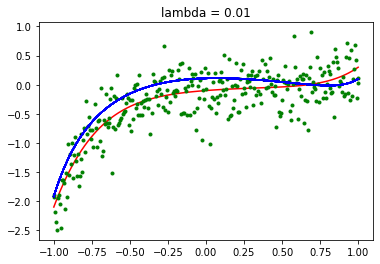

In [56]:
all_xs = np.concatenate([xs, testxs])
all_ys = np.concatenate([ys, testys])

from dataclasses import dataclass

@dataclass
class Data:
    xs: np.ndarray
    ys: np.ndarray

def gen_sample(p_train=0.1):
    n_sample = len(all_xs)
    mask = np.random.random(n_sample) < p_train
    train_data = Data(xs=all_xs[mask], ys=all_ys[mask])
    test_data = Data(xs=all_xs[~mask], ys=all_ys[~mask])
    return train_data, test_data

plt.title(f'lambda = {lmd}')
plt.plot(actualxs, actualys, '-r', label='actual')
plt.plot(all_xs, all_ys, '.g', label='test')

e_outs = []
for i in range(100):
    lmd = 0.01
    training_cost = make_cost(lmd, xs, ys)
    training_error = make_cost(0, xs, ys) # error has no complexity term
    testing_error = make_cost(0, testxs, testys)
    w = minimize(training_cost, [0]*12).x

    predicted_xs = np.linspace(-1, 1, 100)
    predicted_ys = polynomial(w)(predicted_xs)
    plt.title(f'lambda = {lmd}')
    plt.plot(predicted_xs, predicted_ys, '-b', label='predicted', alpha=0.3)
    e_outs.append(testing_error(w))

print(np.mean(e_outs), np.std(e_outs))

6) What happen to the test set? Do we still need it?

In [59]:
# This is a bit controversial.
# My answer is...
# Ideally, yes. 
# Practically, no if number of attemp at cross validation is high enough.

7) Summarize the steps we should to to obtain, evaluate and ship the model.

In [58]:
# For each model
#   try many stratifications
#      train and evaluate the performance
#   performance for that model = mean +- std
# pick the "best" one based on eout.

# Logistic regression revisited

(if we have time if not it's your hw)

Combine what we just learned so far and build a classifier for this data

[[ 1.          2.83183225  2.21788396]
 [ 1.          3.24505985  1.33380711]
 [ 1.          4.20791006  2.17029943]
 ..., 
 [-1.          5.79041673  3.63972547]
 [-1.          6.88819689  4.26226006]
 [-1.         -0.78355493  4.35778885]]


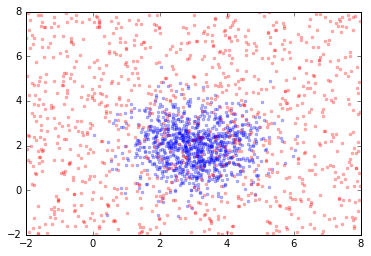

In [133]:

class1 = np.zeros((1000,3))
class1[:, 0] = 1.
class1[:, 1] = np.random.randn(1000)+3
class1[:, 2] = np.random.randn(1000)+2

class2 = np.zeros((1000,3))
class2[:, 0] = -1
class2[:, 1] = np.random.random(1000)*10-2
class2[:, 2] = np.random.random(1000)*10-2

data = np.concatenate([class1, class2])

class1idx = data[:,0] == 1

class2idx = data[:,0] == -1

plt.plot(data[class1idx, 1], data[class1idx, 2], '.b', alpha=0.3)
plt.plot(data[class2idx, 1], data[class2idx, 2], '.r', alpha=0.3)
print data